In [1]:
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
import matplotlib.pyplot as plt

# https://www.cl.cam.ac.uk/research/dtg/attarchive/facesataglance.html
# http://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html#sphx-glr-auto-examples-applications-plot-face-recognition-py

# 下载数据以及认识数据
data_home = "./datasets"
faces = fetch_olivetti_faces(data_home=data_home)
print(dir(faces))

['DESCR', 'data', 'images', 'target']


In [2]:
X = faces.data
y = faces.target
print(np.unique(y))
print(X.shape)
print(faces.images.shape)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
(400, 4096)
(400, 64, 64)


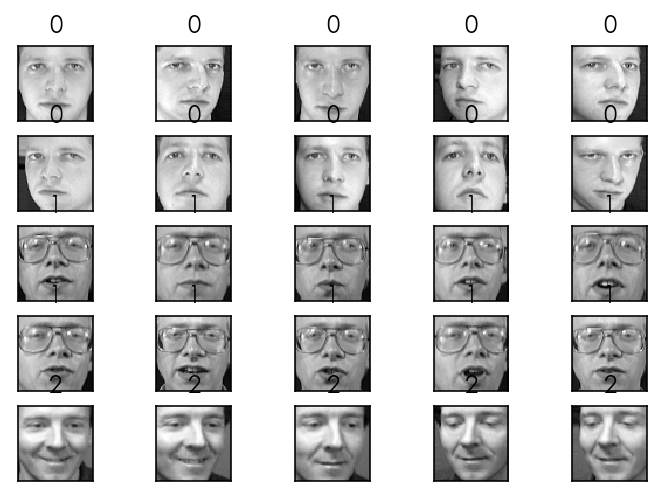

In [3]:
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.title(faces.target[i], size=12)
    plt.imshow(faces.images[i], cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())
plt.show()

In [6]:
# 划分训练集和测试数据集
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=666)

In [13]:
%%time
from sklearn.svm import SVC

# 使用基本分类模型
clf = SVC(class_weight='balanced')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

CPU times: user 1.07 s, sys: 10.9 ms, total: 1.09 s
Wall time: 1.1 s


In [15]:
# 多分类问题，看看混淆矩阵和分类报告
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred)
cm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [19]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         2
          1       0.00      0.00      0.00         2
          2       0.00      0.00      0.00         3
          3       0.00      0.00      0.00         2
          4       0.00      0.00      0.00         3
          5       0.00      0.00      0.00         4
          6       0.00      0.00      0.00         2
          7       0.00      0.00      0.00         0
          8       0.00      0.00      0.00         0
          9       0.00      0.00      0.00         2
         10       0.00      0.00      0.00         0
         11       0.00      0.00      0.00         2
         12       0.00      0.00      0.00         3
         13       0.00      0.00      0.00         1
         14       0.00      0.00      0.00         1
         15       0.00      0.00      0.00         2
         16       0.00      0.00      0.00         3
         17       0.00      0.00      0.00   

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## 使用 PCA 处理数据集

In [30]:
%%time
from sklearn.decomposition import PCA


n_components_list = range(10, 300, 30)
explained_variance_ratio_list = []
for n_components in n_components_list:
    pca = PCA(n_components=n_components)
    pca.fit(X_train, y_train)
    explained_variance_ratio_list.append(np.sum(pca.explained_variance_ratio_))

CPU times: user 5.28 s, sys: 1.85 s, total: 7.14 s
Wall time: 1.27 s


In [31]:
for n_components, evr in zip(n_components_list, explained_variance_ratio_list):
    print(n_components, evr)

10 0.65716916
40 0.85423166
70 0.91063607
100 0.941453
130 0.96079475
160 0.9738938
190 0.9831798
220 0.9897454
250 0.9944052
280 0.9976796


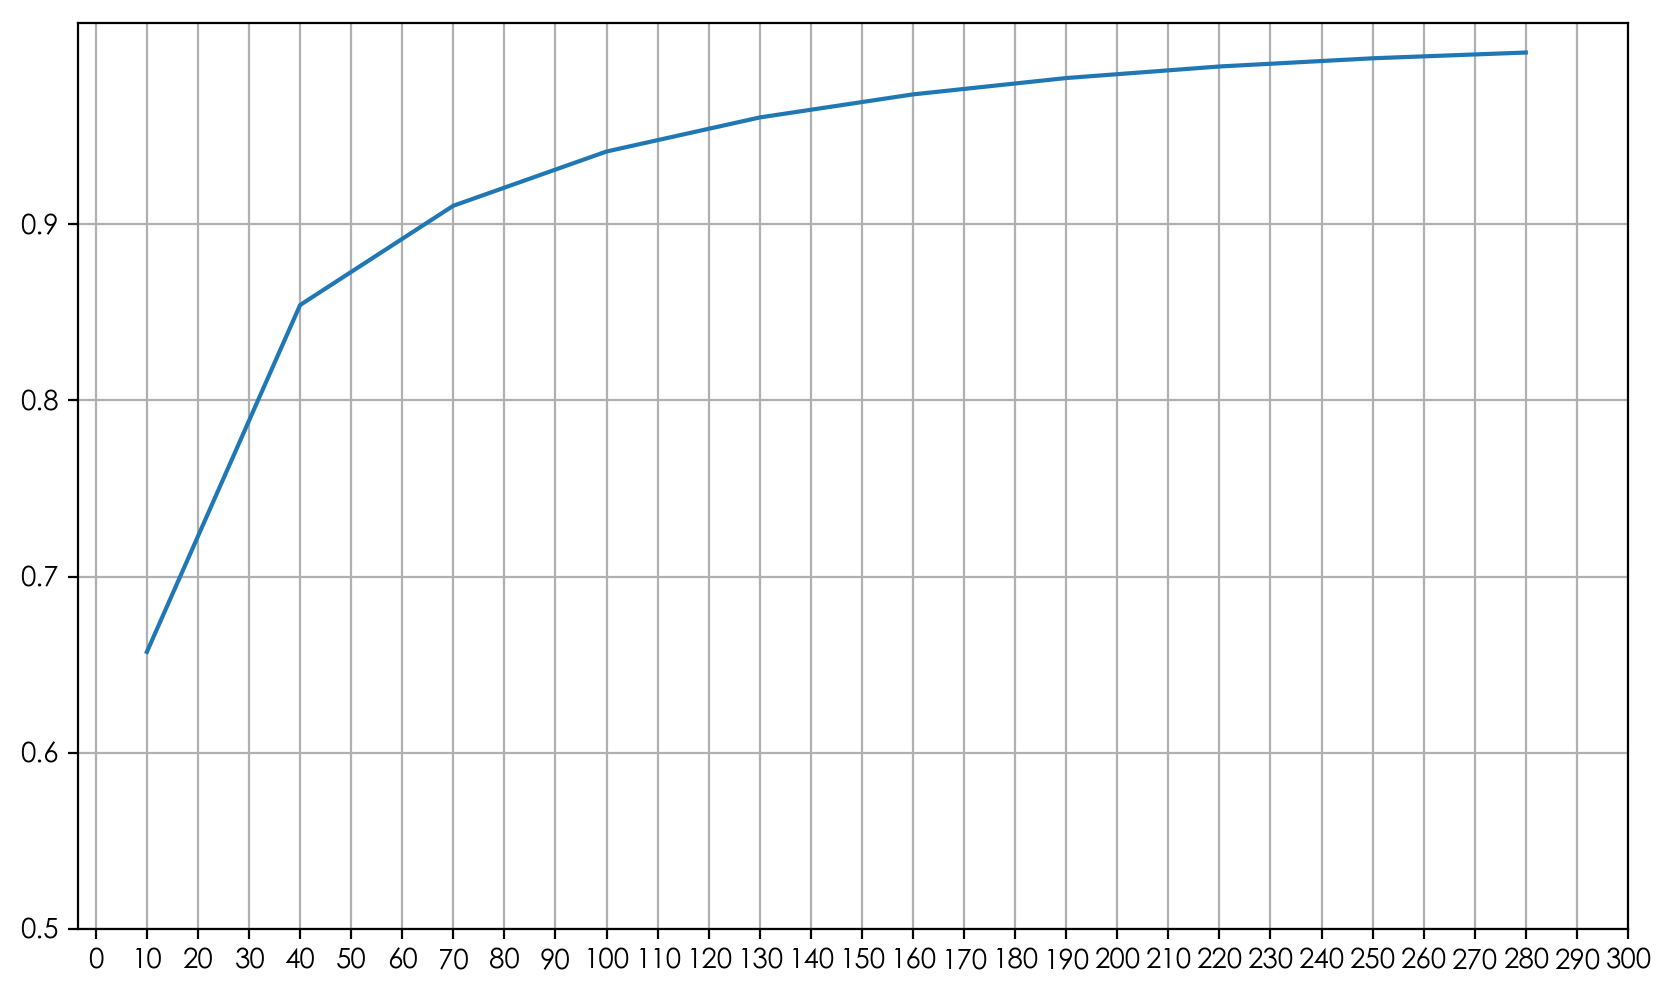

In [44]:
plt.figure(figsize=(10,6),dpi=100)
plt.plot(n_components_list,explained_variance_ratio_list)
plt.grid()

plt.xticks(range(0,301,10))
plt.yticks(np.arange(0.5,1,0.1))
plt.show()

In [46]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
pca.n_components_

112

In [52]:
svc = SVC(class_weight='balanced')
svc.fit(X_train_pca, y_train)

X_test_pca = pca.transform(X_test)
y_pred = svc.predict(X_test_pca)

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 3, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 3]])

In [56]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.50      0.67         2
          1       1.00      1.00      1.00         2
          2       1.00      1.00      1.00         3
          3       1.00      0.50      0.67         2
          4       1.00      0.67      0.80         3
          5       1.00      1.00      1.00         4
          6       1.00      1.00      1.00         2
          9       1.00      1.00      1.00         2
         11       1.00      1.00      1.00         2
         12       0.75      1.00      0.86         3
         13       1.00      1.00      1.00         1
         14       1.00      1.00      1.00         1
         15       1.00      1.00      1.00         2
         16       0.67      0.67      0.67         3
         17       1.00      1.00      1.00         1
         18       1.00      1.00      1.00         2
         19       1.00      1.00      1.00         2
         20       1.00      1.00      1.00   

## 使用网格搜索找到 SVM 的最佳超参数

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


param_grid = {'C': [1, 5, 10, 50, 100], 'gamma': [
    0.0001, 0.0005, 0.001, 0.005, 0.01]}
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                   param_grid, verbose=2, n_jobs=-1)

In [64]:
%%time
clf.fit(X_train_pca, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] C=1, gamma=0.0001 ...............................................
[CV] C=1, gamma=0.0001 ...............................................
[CV] C=1, gamma=0.0005 ...............................................
[CV] C=1, gamma=0.0005 ...............................................
[CV] C=1, gamma=0.0005 ...............................................
[CV] C=1, gamma=0.001 ................................................
[CV] C=1, gamma=0.001 ................................................
[CV] ................................ C=1, gamma=0.0001, total=   0.0s
[CV] ................................ C=1, gamma=0.0001, total=   0.0s
[CV] ................................ C=1, gamma=0.0005, total=   0.0s
[CV] ................................ C=1, gamma=0.0005, total=   0.1s
[CV] ................................ C=1, gamma=0.0005, total=   0.0s
[CV] ...........

[CV] ................................ C=100, gamma=0.01, total=   0.0s
[CV] .............................. C=100, gamma=0.0001, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] C=100, gamma=0.0001 .............................................
[CV] ............................... C=50, gamma=0.0005, total=   0.0s
[CV] ................................. C=50, gamma=0.01, total=   0.0s
[CV] C=50, gamma=0.01 ................................................
[CV] ................................ C=50, gamma=0.001, total=   0.0s
[CV] C=50, gamma=0.0005 ..............................................
[CV] C=50, gamma=0.005 ...............................................
[CV] .............................. C=100, gamma=0.0005, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] ............................... C=100, gamma=0.005, total=   0.0s
[CV] .............................. C=100, gamma=0.0001, total=   0.0s
[CV] .

[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.8s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [1, 5, 10, 50, 100], 'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [65]:
clf.best_params_

{'C': 50, 'gamma': 0.0005}

In [66]:
clf.best_estimator_

SVC(C=50, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0005, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [67]:
clf.best_score_

0.94375

In [69]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = clf.best_estimator_.predict(X_test_pca)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         2
          1       1.00      1.00      1.00         2
          2       1.00      1.00      1.00         3
          3       1.00      1.00      1.00         2
          4       1.00      0.67      0.80         3
          5       0.80      1.00      0.89         4
          6       1.00      1.00      1.00         2
          9       1.00      1.00      1.00         2
         11       1.00      1.00      1.00         2
         12       1.00      1.00      1.00         3
         13       1.00      1.00      1.00         1
         14       1.00      1.00      1.00         1
         15       1.00      1.00      1.00         2
         16       1.00      1.00      1.00         3
         17       1.00      1.00      1.00         1
         18       1.00      1.00      1.00         2
         19       1.00      1.00      1.00         2
         20       1.00      1.00      1.00   

+ 可以看到，已经有很好的效果了。